# 9-Qubit Error Correcting Code


#### In this notebook, we will show the functionality of the First Full Quantum Code.
#### We will refer back to the 3-Qubit Code, as the 9-Qubit Code is a repetition code.

In [1]:
import numpy as np

from qec_helpers import *
# Importing required libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit import user_config
from qiskit.quantum_info import partial_trace
import numpy as np
import random
from qiskit.extensions import UnitaryGate

# Visualization of circuits: Initializing backend simulators
qasm_sim = Aer.get_backend('qasm_simulator')
sv_sim = Aer.get_backend('statevector_simulator')

# Setting mpl as default drawer
%env QISKIT_SETTINGS {}
user_config.set_config('circuit_drawer', 'mpl')



env: QISKIT_SETTINGS={}


In [2]:
# Initializing the Pauli operators
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,1j],[-1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
sigma_I = np.identity(2)
print('Below we show the Pauli Operators which can be used to describe any quantum gate on an individual qubit:')
print('Pauli-X: \n', sigma_x) 
print('Pauli-Y: \n', sigma_y)
print('Pauli-Z: \n', sigma_z)
print('Pauli-I: \n', sigma_I)

Below we show the Pauli Operators which can be used to describe any quantum gate on an individual qubit:
Pauli-X: 
 [[0 1]
 [1 0]]
Pauli-Y: 
 [[ 0.+0.j  0.+1.j]
 [-0.-1.j  0.+0.j]]
Pauli-Z: 
 [[ 1  0]
 [ 0 -1]]
Pauli-I: 
 [[1. 0.]
 [0. 1.]]


### Gate Operations Review ( CX and Z ):

#### Having the CX (CNOT) and Z (Phase) Error Correcting Code, allows for the implementation of error correction codes and the protection of quantum information against noise and errors.


#### The CNOT gate is typically used to establish entanglement between qubits and implement controlled operations. 

#### "CNOT gates can be represented with the matrix below and it performs an operation on two qubits. One being the target qubit and the other the control

#### If the control is $\vert0\rangle$ then nothing happens, but if the control is $\vert1\rangle$, target qubit switches states to either  $\vert0\rangle$ or $\vert1\rangle$ "

#### CNOT gate matrix representation:  $$\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}$$


#### The Z gate, also known as the Phase gate, is a single-qubit gate that introduces a phase shift of $\pi$ to the qubit state. 
#### Phase Shift: Refers to a change in the timing or alignment of a wave or oscillation. 

#### The Z gate is represented by the following matrix:

$$Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}$$

####  When applied to the $\vert0\rangle$ state, the Z gate leaves it unchanged. However, when applied to the $\vert1\rangle$ state, the Z gate introduces a phase shift of $\pi$ (or a phase flip) to the state. The effect of the Z gate can be described as follows:

$$Z\vert0\rangle = \vert0\rangle$$

$$Z\vert1\rangle = -\vert1\rangle$$


### Initializing the 9-qubit logical state

#### The 9 Qubit code is the first full quantum code - It can simultaneously correct for bit flips and phase flips.
#### In this algorithm a single logical qubit is encoded using 9 physical qubits, and it is able to correct for a single $\sigma_x$ error (bit flip) and $\sigma_x$ (phase-flip)

#### In this case we will define our two logical states as $\vert0\rangle_L$ and $\vert1\rangle_L$ where $|0\rangle_L = \frac{1}{\sqrt{8}} \left( |000\rangle + |111\rangle \right) \left( |000\rangle + |111\rangle \right) \left( |000\rangle + |111\rangle \right)$ and
$|1\rangle_L = \frac{1}{\sqrt{8}} \left( |000\rangle - |111\rangle \right) \left( |000\rangle - |111\rangle \right) \left( |000\rangle - |111\rangle \right)$ and $\vert1\rangle_L = \vert111\rangle$

#### A single qubit state is still represented by $\vert\psi\rangle_L = \alpha\vert0\rangle_L + \beta\vert1\rangle_L$




### Below we show the quantum circuit for encoding a single logical qubit in a 9-qubit system. It consists of one data qubit and eight ancilla qubits initialized to $\vert0\rangle$:

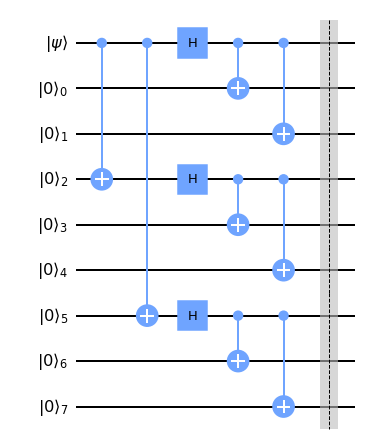

In [3]:

psi = QuantumRegister(1, '|ψ⟩')
ancilla = QuantumRegister(8, '|0⟩')

qc = QuantumCircuit(psi, ancilla)
qc.cnot(0, 3)
qc.cnot(0, 6)
qc.h(0)
qc.h(3)
qc.h(6)
qc.cnot(0, 1)
qc.cnot(3, 4)
qc.cnot(6, 7)
qc.cnot(0, 2)
qc.cnot(3, 5)
qc.cnot(6, 8)
qc.barrier()

qc.draw()
 



In [ ]:
def nine_qubit_initialize_logical_state(initial_psi):
    initial_ancilla_state = np.array([1, 0])  # initializing the |0> state of the ancilla qubits
    psi = initial_psi  # setting psi to |0> or |1>
    
    # Initialize the 9 qubit logical state
    initial_logical_state = np.kron(psi, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, np.kron(initial_ancilla_state, initial_ancilla_state))))))))
    
    # Setting up the logical qubit using CNOT gates
    # We call functions cnot and non_adj_CNOT from the notebook: QEC Helpers

    non_adj_CNOT_psi_qthree = np.kron(non_adj_CNOT(0, 3, 9), np.identity(2 ** 6))
    non_adj_CNOT_psi_qsix = np.kron(non_adj_CNOT(0, 6, 9), np.identity(2 ** 3))
    
    hadamard_psi = np.kron(hadamard, np.identity(2 ** 8))
    hadamard_three = np.kron(hadamard, np.identity(2 ** 5))
    hadamard_six = np.kron(hadamard, np.identity(2 ** 2))
    
    cnot_psi_qone = np.kron(cnot, np.identity(2 ** 7))
    cnot_qthree_qfour = np.kron(cnot, np.identity(2 ** 6))
    cnot_qsix_qseven = np.kron(cnot, np.identity(2 ** 3))
    
    non_adj_CNOT_psi_qtwo = np.kron(non_adj_CNOT(0, 2, 9), np.identity(2 ** 7))
    non_adj_CNOT_qthree_qfive = np.kron(non_adj_CNOT(3, 5, 9), np.identity(2 ** 4))
    non_adj_CNOT_qsix_qeight = np.kron(non_adj_CNOT(6, 8, 9), np.identity(2 ** 1))
    
    # Apply the gates to the initial logical state
    final_logical_state = np.dot(np.kron(non_adj_CNOT_qsix_qeight, np.kron(
        non_adj_CNOT_qthree_qfive, np.kron(non_adj_CNOT_psi_qtwo, np.kron(
            cnot_qsix_qseven, np.kron(cnot_qthree_qfour, np.kron(
                cnot_psi_qone, np.kron(hadamard_six, np.kron(
                    hadamard_three, np.kron(hadamard_psi, np.kron(
                        non_adj_CNOT_psi_qsix, non_adj_CNOT_psi_qthree))))))))), initial_logical_state))
    
    return final_logical_state, psi, initial_logical_state



print('Psi State: ', psi)
print('Initial Logical State: ', initial_logical_state)
print('Final Logical State (Vector Representation): ', final_logical_state.astype(int))

## Encoding and correcting for a single X error

#### One thing to note about the circuit above is that three bit flips are required to encode a single qubit. This number is defined as the distance between two codeword states and is given the variable d. With this we are able to calculate the number of errors that can be corrected:
$$ t = \left\lfloor \frac{(d-1)}{2} \right\rfloor$$
#### In the case of the 3 qubit code, we can see that d = 3 and thus t = 1

#### Now in order to actually be able to correct for errors we require two more ancilla qubits to obtain information about possible errors (syndrome information) without directly measuring the exact state of any of the qubits in the logical qubit.
#### Our new circuit will now look like this:

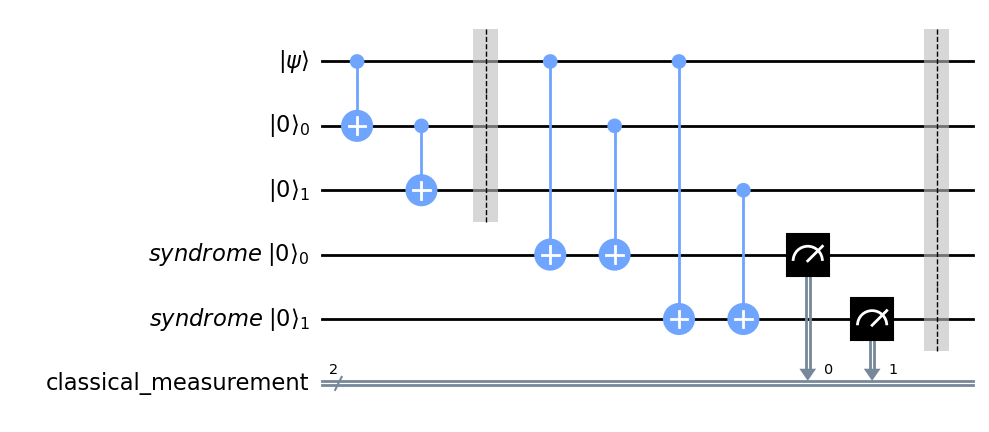

In [807]:
psi = QuantumRegister(1, '|ψ⟩')
ancilla = QuantumRegister(2, '|0⟩')
syndrome_ancilla = QuantumRegister(2, 'syndrome |0⟩')
classical_bits = ClassicalRegister(2, 'classical_measurement')
qc = QuantumCircuit(psi, ancilla, syndrome_ancilla, classical_bits)
qc.cnot(0, 1)
qc.cnot(1, 2)
qc.barrier(0,1,2) # A bit flip error occurs here
qc.cnot(0, 3)
qc.cnot(1, 3)
qc.cnot(0, 4)
qc.cnot(2, 4)
qc.measure(syndrome_ancilla, classical_bits)
qc.barrier()
qc.draw()

#### The first dashed line represents the bit flip (X) error that occurs to any of the first 3 data qubits. After that we apply 4 CNOT gates to obtain the error information. Then we classically measure the syndrome qubits to see if an error occured and where the error is. 

#### In this example we assume that the error only occurs where the dashed line is and all other gate operations are 'perfect'. Additionally we assume that only a single bit flip error occurs.

#### Now we will simulate what would happen if a single X bit flip error occurs at a random location after we have initialized the 3 qubit logical state. We can mathematically represent each errror at a location as the following:

#### If the error occurs at the 0th qubit ($\vert\psi\rangle$): $(X \otimes I_2 \otimes I_2)\vert\psi q_1 q_2 \rangle$
#### If the error occurs at the 1st qubit ($\vert q_1\rangle$): $(I_2 \otimes X \otimes I_2)\vert\psi q_1 q_2 \rangle$
#### If the error occurs at the 2nd qubit ($\vert q_2\rangle$): $(I_2 \otimes I_2 \otimes X)\vert\psi q_1 q_2 \rangle$
#### Where X is the Pauli-x ($\sigma_x$) operator

In [14]:
# After we have initialized the 3-qubit logical state, we will apply a random error to one of the qubits.
def three_qubit_random_qubit_x_error(logical_state):
    error_index = random.randint(-1,2)
    if error_index == 0:
        errored_logical_state = np.dot(np.kron(sigma_x, np.identity(4)), logical_state)
    elif error_index == 1:
        errored_logical_state = np.dot(np.kron(np.kron(np.identity(2), sigma_x), np.identity(2)), logical_state)
    elif error_index == 2:
        errored_logical_state = np.dot(np.kron(np.identity(4), sigma_x), logical_state)
    else:
        errored_logical_state = logical_state
        
    return errored_logical_state, error_index

# After we have initialized the 3-qubit logical state, we will apply a defined error to one of the qubits.
def three_qubit_defined_qubit_x_error(logical_state, error_index):
    if error_index == 0:
        errored_logical_state = np.dot(np.kron(sigma_x, np.identity(4)), logical_state)
    elif error_index == 1:
        errored_logical_state = np.dot(np.kron(np.kron(np.identity(2), sigma_x), np.identity(2)), logical_state)
    elif error_index == 2:
        errored_logical_state = np.dot(np.kron(np.identity(4), sigma_x), logical_state)
    else:
        errored_logical_state = logical_state
        
    return errored_logical_state, error_index

# Print out the errored logical state and the index qubit which the error occured (using the final state from before)
state, qubit_errored = three_qubit_random_qubit_x_error(final_logical_state)
print('Logical State without the random X error: ', final_logical_state.astype(int))
print('Logical Satte with the random X error: ', state.astype(int))
print('The Error occured at qubit: ', qubit_errored)

NameError: name 'final_logical_state' is not defined

### Next we need to be able to find where the qubit errored without directly knowing where it errored (kind of counter intuitive). Since this is a simulation we are able to print out what index the qubit actaully errored at to check our work, but in reality we wont know. So we should have a way to determine this. That is where our syndrome ancilla qubits come into play. They will tell us where our error occured!

#### Below we derive each CNOT gate represented in the ciruit above as a 32 x 32 matrix. Since the matrix is too large to show, we can follow a different process to deriving the CNOT gates than we did earlier for the logical state initialization. 

#### We will be using the following derivation method for a CNOT gate with one qubit in between the control and target qubits (thus the qubits that the gate acts on are non-adjacent). For this CNOT gate it is not so simple, like our previous derivation for a 3-qubit CNOT since there is no known kronecker product that would lead to the transformation needed. Thus we can derive it by looking at what happens to the logical states of the qubit when we apply this gate.
https://quantumcomputing.stackexchange.com/questions/4252/how-to-derive-the-cnot-matrix-for-a-3-qubit-system-where-the-control-target-qu/4254#4254

$$ CNOT\vert000\rangle \to \vert000\rangle = [1 0 0 0 0 0 0 0 ]^T\\ CNOT\vert001\rangle \to \vert001\rangle = [0 1 0 0 0 0 0 0 ]^T \\
CNOT\vert010\rangle \to \vert010\rangle = [0 0 1 0 0 0 0 0 ]^T\\ CNOT\vert011\rangle \to \vert011\rangle = [0 0 0 1 0 0 0 0 ]^T \\
CNOT\vert100\rangle \to \vert101\rangle = [0 0 0 0 0 1 0 0 ]^T\\ CNOT\vert101\rangle \to \vert100\rangle = [0 0 0 0 1 0 0 0 ]^T \\
CNOT\vert110\rangle \to \vert111\rangle = [0 0 0 0 0 0 0 1 ]^T\\ CNOT\vert111\rangle \to \vert110\rangle = [0 0 0 0 0 0 1 0 ]^T $$

#### Now if you look closely when we put these together as the collumns of out matrix we get:


$$ CNOT_{\psi, 1} = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0
\end{pmatrix}$$

#### Which is the matrix representation for the CNOT gate when our 2 qubits are not adjacent in the 3-qubit system.

### Deriving the qubit gates for the Circuit above:
#### For the first CNOT gate, we can see that there are 2 qubits in between the control and target qubits. Thus we need to use the second method when we derived the CNOT for non-adjacent qubits, only this time we have 5 qubits to keep track of. But we do not actually need to compute 32 states of the qubit. If we notice that the first 16 transformations will do nothing to our state since the first qubit is in the $\vert0\rangle$ state. Thus we only need to change the last 16 columns. We can compute the transformations that occur and set the new tensor products of the qubit states as the columns of our matrix. (again this is the same process as deriving the non-adjacent CNOT, just with more qubits)

In [809]:
# Used to perform a CNOT gate on 2 non-adjacent qubits (i.e. |psi> and |q_1>)
def non_adjacent_qubit_cnot():
    cnot = np.identity(8)
    cnot[4:] = 0
    cnot[4][5] = 1
    cnot[5][4] = 1
    cnot[7][6] = 1
    cnot[6][7] = 1
    return cnot

In [810]:
# Finding the matrix operation for first cnot gate after the error occurs in the circuit above
np.set_printoptions(threshold=np.inf)
zero = np.array([1, 0])
one = np.array([0, 1])
def first_cnot():
    matrix = np.identity(32)
    matrix[:][16] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, zero))))
    matrix[:][17] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, one))))
    matrix[:][18] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(zero, zero))))
    matrix[:][19] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(zero, one))))
    matrix[:][20] = np.kron(one, np.kron(zero, np.kron(one, np.kron(one, zero))))
    matrix[:][21] = np.kron(one, np.kron(zero, np.kron(one, np.kron(one, one))))
    matrix[:][22] = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, zero))))
    matrix[:][23] = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, one))))
    matrix[:][24] = np.kron(one, np.kron(one, np.kron(zero, np.kron(one, zero))))
    matrix[:][25] = np.kron(one, np.kron(one, np.kron(zero, np.kron(one, one))))
    matrix[:][26] = np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, zero))))
    matrix[:][27] = np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, one))))
    matrix[:][28] = np.kron(one, np.kron(one, np.kron(one, np.kron(one, zero))))
    matrix[:][29] = np.kron(one, np.kron(one, np.kron(one, np.kron(one, one))))
    matrix[:][30] = np.kron(one, np.kron(one, np.kron(one, np.kron(zero, zero))))
    matrix[:][31] = np.kron(one, np.kron(one, np.kron(one, np.kron(zero, one))))
    return matrix

# Testing outputs
print(np.dot(first_cnot(), np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, zero))))).astype(int)) # applying CNOT
print(np.kron(one, np.kron(zero, np.kron(one, np.kron(one, zero))))) # Put state that it should be in after operation

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


#### For the second CNOT gate we notice that there is only one qubit in between the control and the target. Thus we can implement the non-adjacent CNOT gate and just tensor it with the Identity 2x2 matrix as shown below.
$$CNOT_{q_1, q_3} = I_2 \otimes CNOT_{non-adj} \otimes I_2$$

In [811]:
# Finding the matrix operation for second cnot gate after the error occurs in the circuit above
# For this we will be able to implement the non-adjacent CNOT gate that we derived earlier in the notebook
def second_cnot():
    matrix = np.kron(np.identity(2), np.kron(non_adjacent_qubit_cnot(), np.identity(2)))
    return matrix

# Testing outputs
print(np.dot(second_cnot(), np.kron(one, np.kron(one, np.kron(one, np.kron(one, zero))))).astype(int)) # applying CNOT
print(np.kron(one, np.kron(one, np.kron(one, np.kron(zero, zero))))) # Put state that it should be in after operation


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


#### For the third CNOT gate, we can see that there are 3 qubits in between the control and target qubits. Thus we need to use the second method when we derived the CNOT for non-adjacent qubits, only this time we have 5 qubits to keep track of. But we do not actually need to compute 32 states of the qubit. If we notice that the first 16 transformations will do nothing to our state since the first qubit is in the $\vert0\rangle$ state just like with the first CNOT we derived previously. Thus we only need to change the last 16 columns. We can compute the transformations that occur and set the new tensor products of the qubit states as the columns of our matrix. (again this is the same process as deriving the non-adjacent CNOT, just with more qubits)

In [812]:
# Finding the matrix operation for third cnot gate after the error occurs in the circuit above
np.set_printoptions(threshold=np.inf)
zero = np.array([1, 0])
one = np.array([0, 1])
def third_cnot():
    matrix = np.identity(32)
    matrix[:][16] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(zero, one))))
    matrix[:][17] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(zero, zero))))
    matrix[:][18] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, one))))
    matrix[:][19] = np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, zero))))
    matrix[:][20] = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, one))))
    matrix[:][21] = np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, zero))))
    matrix[:][22] = np.kron(one, np.kron(zero, np.kron(one, np.kron(one, one))))
    matrix[:][23] = np.kron(one, np.kron(zero, np.kron(one, np.kron(one, zero))))
    matrix[:][24] = np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, one))))
    matrix[:][25] = np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, zero))))
    matrix[:][26] = np.kron(one, np.kron(one, np.kron(zero, np.kron(one, one))))
    matrix[:][27] = np.kron(one, np.kron(one, np.kron(zero, np.kron(one, zero))))
    matrix[:][28] = np.kron(one, np.kron(one, np.kron(one, np.kron(zero, one))))
    matrix[:][29] = np.kron(one, np.kron(one, np.kron(one, np.kron(zero, zero))))
    matrix[:][30] = np.kron(one, np.kron(one, np.kron(one, np.kron(one, one))))
    matrix[:][31] = np.kron(one, np.kron(one, np.kron(one, np.kron(one, zero))))
    return matrix

# Testing outputs
print(np.dot(third_cnot(), np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, zero))))).astype(int)) # applying CNOT
print(np.kron(one, np.kron(zero, np.kron(one, np.kron(zero, one))))) # Put state that it should be in after operation


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


#### For the fourth CNOT gate we again notice that there is only one qubit in between the control and the target. Thus we can implement the non-adjacent CNOT gate and just tensor it with the Identity 2x2 matrix as shown below.
$$CNOT_{q_2, q_4} = I_2 \otimes CNOT_{non-adj} \otimes I_2$$

In [813]:
# Finding the matrix operation for fourth cnot gate after the error occurs in the circuit above
# For this we will be able to implement the non-adjacent CNOT gate that we derived earlier in the notebook
def fourth_cnot():
    matrix = np.kron(np.identity(4), non_adjacent_qubit_cnot())
    return matrix

# Testing outputs
print(np.dot(fourth_cnot(), np.kron(one, np.kron(one, np.kron(zero, np.kron(one, zero))))).astype(int)) # applying CNOT
print(np.kron(one, np.kron(one, np.kron(zero, np.kron(one, zero))))) # Put state that it should be in after operation


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


### Instead of using the tedious methods from above, the following function was created to make a matrix representation of a non-adjacent CNOT gate

#### Below I construct a function to create a non-adjacent CNOT gate for any number of qubits in between the control and target. The reference I use is Proposition 8 of this document:
https://hal-normandie-univ.archives-ouvertes.fr/hal-02948598/document

#### Where we let $ i_1, i_2, ..., i_p \space (p - 1 \ge 2) $ be distinct integers such that
$$ CNOT_{i_1, i_p} = \biggl(CNOT_{i_1, i_2}CNOT_{i_2, i_3} . . . CNOT_{i_{p-2}, i_{p-1}}CNOT_{i_{p-1}, i_p}CNOT_{i_{p-2}, i_{p-1}} . . . CNOT_{i_2, i_3}\biggr)^2 $$

#### This is simply used to construct the non-adjacent CNOT gate matrix, thus we do not take into account the individual gate errors that go into making the full gate. However, in the future we may do this.

In [814]:
# This function is used to implement a non-adjacent CNOT gate between 2 qubits in a system
def non_adj_CNOT(control, target, tot_qubits):
    # control: control qubit index (starting from 0)
    # target: target qubit index (starting from 0)
    # tot_qubits: total number of qubits in the system
    
    p = target - control # used to index over all gates neeeded
    all_dots = np.array([[]]) # array used to keep track of the components we will combine at the end
    
    # Indexing over the values of p to get the first half of the formula
    for j in range(p):
        # Sets the next component of the matrix multiplication up
        next_dot = np.kron(np.identity(2**(j)), np.kron(cnot, np.identity(2**(p-j-1))))
        
        # Adds the components to the array and multiplies them together
        if j == 0:
            all_dots = np.array([next_dot])
            gate = all_dots[j]
        else:
            all_dots = np.append(all_dots, [next_dot], axis = 0)
            gate = np.dot(gate, all_dots[j])
            
    # Indexing over values of p such that we get the 2nd half of the equation together
    for j in range(p - 2):
        gate = np.dot(gate, all_dots[p-j-2])
    
    # Squares the final matrix
    final_gate = np.dot(gate, gate)
    
    # Adds the dimensions needed depending on the tot_qubits
    n1 = control # exponent used to tensor the left side identity matrix for our full system
    n2 = tot_qubits - target - 1 # exponent used to tensor the right side identity matrix for our full system
    final_total_gate = np.kron(np.identity(2**(n1)), np.kron(final_gate, np.identity(2**(n2))))
    
    return final_total_gate

In [815]:
# Testing
print(np.array_equiv(third_cnot(), non_adj_CNOT(0,4,5)))
print(np.array_equiv(first_cnot(), non_adj_CNOT(0,3,5)))
print(np.array_equiv(second_cnot(), non_adj_CNOT(1,3,5)))
print(np.array_equiv(fourth_cnot(), non_adj_CNOT(2,4,5)))

True
True
True
True


### Below is the code to put together the 4 CNOT gates after initializing the 3 qubit logical state and then applying a random error. Note that the error function has 4 options, error on qubit 0, error on qubit 1, error on qubit 2, or no error at all.

In [816]:
# Code implementing the Syndrome Ancilla Qubits to check where the error occured
zero = np.array([1, 0])
one = np.array([0, 1])
initial_psi = one
# Initialize our system and apply an X error
initial_state = three_qubit_initialize_logical_state(initial_psi)[0] # Initialize our 3 qubit logical state
error_state = three_qubit_random_qubit_x_error(initial_state)[0] # Apply a random X error to one of our 3 qubits

# Now we can apply the CNOT gates that we just derived.
def three_qubit_extend_system(state):
    full_system = np.kron(state, np.kron(zero, zero)) # Extend our system to add in the 2 syndrome ancilla qubits
    # Using the first method derived for each non-adjacent CNOT gate
#     final_state = np.dot(fourth_cnot(), np.dot(third_cnot(), np.dot(second_cnot(), np.dot(first_cnot(), full_system))))
    # Using the new function created above
    final_state = np.dot(non_adj_CNOT(2,4,5), np.dot(non_adj_CNOT(0,4,5), 
                                                     np.dot(non_adj_CNOT(1,3,5), np.dot(non_adj_CNOT(0,3,5), full_system))))
    return final_state

final_state = three_qubit_extend_system(error_state)
print(final_state.astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


#### We can now construct a table with the possible results of bit flip error which can occur and how we will detect them using the two syndrome ancilla qubits. For each different error, the syndrome ancillas are flipped to a unique state which we can then measure and apply a correction. The $\sigma_x$ or bit flip correction would be classically controlled depending on the syndrome ancilla.

In [817]:
error_table = PrettyTable(["Error Location", "Final State, |data⟩|ancilla⟩"])
 
error_table.add_row(["No Error", "alpha|000⟩|00⟩ + beta|111⟩|00⟩"])
error_table.add_row(["Qubit 0 (|ψ⟩)", "alpha |100⟩|11⟩ + beta|011⟩|11⟩"])
error_table.add_row(["Qubit 1 (|0⟩_0)", "alpha |010⟩|10⟩ + beta|101⟩|10⟩"])
error_table.add_row(["Qubit 2 (|0⟩_1)", "alpha |001⟩|01⟩ + beta|110⟩|01⟩"])
 
print(error_table)

+-----------------+---------------------------------+
|  Error Location |   Final State, |data⟩|ancilla⟩  |
+-----------------+---------------------------------+
|     No Error    |  alpha|000⟩|00⟩ + beta|111⟩|00⟩ |
|  Qubit 0 (|ψ⟩)  | alpha |100⟩|11⟩ + beta|011⟩|11⟩ |
| Qubit 1 (|0⟩_0) | alpha |010⟩|10⟩ + beta|101⟩|10⟩ |
| Qubit 2 (|0⟩_1) | alpha |001⟩|01⟩ + beta|110⟩|01⟩ |
+-----------------+---------------------------------+


#### However it is important to note that this 3 qubit code can only correct a maximum of one bit flip error on a single qubit. Anything else will cause ambiguity of syndrome results. This can be seen in the table below where we see multiple errors occuring and the assumed error that our ancilla tell us.

In [818]:
multi_error_table = PrettyTable(["Error Location", "Final State, |data⟩|ancilla⟩", "Assumed Error"])
 
multi_error_table.add_row(["Qubit 0 and 1", "alpha|110⟩|01⟩ + beta|001⟩|01⟩", "sigma_x on Qubit 2"])
multi_error_table.add_row(["Qubit 1 and 2", "alpha |011⟩|11⟩ + beta|100⟩|11⟩", "sigma_x on Qubit 0"])
multi_error_table.add_row(["Qubit 0 and 2", "alpha |101⟩|10⟩ + beta|010⟩|10⟩", "sigma_x on Qubit 1"])
multi_error_table.add_row(["Qubit 0, 1, and 2", "alpha |111⟩|00⟩ + beta|000⟩|00⟩", "no error"])

print('We can see that with multiple errors occuring at different qubits we would not be able to tell what is going on.')
print(multi_error_table)

We can see that with multiple errors occuring at different qubits we would not be able to tell what is going on.
+-------------------+---------------------------------+--------------------+
|   Error Location  |   Final State, |data⟩|ancilla⟩  |   Assumed Error    |
+-------------------+---------------------------------+--------------------+
|   Qubit 0 and 1   |  alpha|110⟩|01⟩ + beta|001⟩|01⟩ | sigma_x on Qubit 2 |
|   Qubit 1 and 2   | alpha |011⟩|11⟩ + beta|100⟩|11⟩ | sigma_x on Qubit 0 |
|   Qubit 0 and 2   | alpha |101⟩|10⟩ + beta|010⟩|10⟩ | sigma_x on Qubit 1 |
| Qubit 0, 1, and 2 | alpha |111⟩|00⟩ + beta|000⟩|00⟩ |      no error      |
+-------------------+---------------------------------+--------------------+


#### Thus from above we can see that our tensored vectors will look different depending on where the error is.


In [819]:
# When the Initial Logical State is |0>
a = 0
b = 1
print('When the Initial Logical State is |0>')
print('No Error: ', a * np.kron(zero, np.kron(zero, np.kron(zero, np.kron(zero, zero)))).astype(int) +
     b * np.kron(one, np.kron(one, np.kron(one, np.kron(zero, zero)))).astype(int))
print('Error on 0th qubit: ', a * np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, one)))).astype(int) +
     b * np.kron(zero, np.kron(one, np.kron(one, np.kron(one, one)))).astype(int))
print('Error on 1st qubit: ', a * np.kron(zero, np.kron(one, np.kron(zero, np.kron(one, zero)))).astype(int) +
     b * np.kron(one, np.kron(zero, np.kron(one, np.kron(one, zero)))).astype(int))
print('Error on 2nd qubit: ', a * np.kron(zero, np.kron(zero, np.kron(one, np.kron(zero, one)))).astype(int) +
     b * np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, one)))).astype(int))
# When the Initial Logical State is |1> 
a = 1
b = 0
print('\nWhen the Initial Logical State is |1>')
print('No Error: ', a * np.kron(zero, np.kron(zero, np.kron(zero, np.kron(zero, zero)))).astype(int) +
     b * np.kron(one, np.kron(one, np.kron(one, np.kron(zero, zero)))).astype(int))
print('Error on 0th qubit: ', a * np.kron(one, np.kron(zero, np.kron(zero, np.kron(one, one)))).astype(int) +
     b * np.kron(zero, np.kron(one, np.kron(one, np.kron(one, one)))).astype(int))
print('Error on 1st qubit: ', a * np.kron(zero, np.kron(one, np.kron(zero, np.kron(one, zero)))).astype(int) +
     b * np.kron(one, np.kron(zero, np.kron(one, np.kron(one, zero)))).astype(int))
print('Error on 2nd qubit: ', a * np.kron(zero, np.kron(zero, np.kron(one, np.kron(zero, one)))).astype(int) +
     b * np.kron(one, np.kron(one, np.kron(zero, np.kron(zero, one)))).astype(int))

When the Initial Logical State is |0>
No Error:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
Error on 0th qubit:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error on 1st qubit:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Error on 2nd qubit:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]

When the Initial Logical State is |1>
No Error:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error on 0th qubit:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
Error on 1st qubit:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Error on 2nd qubit:  [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### The function below was made to be able to detect where the error occurs:

In [820]:
# Used to find where this error actually occured from the vector 
def three_qubit_detect_error_location_from_vector(logical_state):
    error_index = -1
    if (logical_state[28] != 0) or (logical_state[0] != 0):
        error_index = -1
        return error_index, print("No bit flip error occured.")
    elif (logical_state[15] != 0) or (logical_state[19] != 0):
        error_index = 0
    elif (logical_state[22] != 0) or (logical_state[10] != 0):
        error_index = 1
    elif (logical_state[25] != 0) or (logical_state[5] != 0):
        error_index = 2
        
    return error_index, print("Bit flip error occured on qubit", error_index )

three_qubit_detect_error_location_from_vector(final_state)

No bit flip error occured.


(-1, None)

### Now to correct the error:

In [821]:
### Now we can correct for these errors by applying X gates to the qubit where the error occured.
def three_qubit_correct_full_x_error(final_state):
    qubit_index = three_qubit_detect_error_location_from_vector(final_state)[0]
    if qubit_index == 0:
        corrected_state = np.dot(np.kron(sigma_x, np.identity(16)), final_state)
    elif qubit_index == 1:
        corrected_state = np.dot(np.kron(np.identity(2), np.kron(sigma_x, np.identity(8))), final_state)
    elif qubit_index == 2:
        corrected_state = np.dot(np.kron(np.identity(4), np.kron(sigma_x, np.identity(4))), final_state)
    else:
        corrected_state = final_state
    
    return corrected_state


print(three_qubit_correct_full_x_error(final_state).astype(int))

No bit flip error occured.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


#### Below we take the qubit state (32 element array) and take only the first 3 qubits to make sure that the correction worked. This is done by using the function below, but you are able to take as many qubits as youd like from the full system using the function.

In [827]:
# Maybe add in n number of qubits so it works for any system. (currently only works for 5 maximum)
def full_state_to_logical_state(state, k):
    # state: the full logical state of the qubit system you wish to reduce
    # k: the number of qubits you wish to reduce the system to (must be less than the full system size)
    index_of_element = -1
    for i in range(state.size):
        if state[i] != 0:
            index_of_element = i
            break

    bits = bin(index_of_element)
    n = int(np.log(len(state))/np.log(2) + 2)
    if len(bits) == n:
        bits = bits[2:2+k]
    elif len(bits) == n-1:
        bits = '0' + bits[2:2+k-1]
    elif len(bits) == n-2:
        bits = '00' + bits[2:2+k-2]
    else:
        bits = '000' + bits[2:2+k-3]
    
    for i in range(0,k):
        if len(bits) < k:
            bits = bits + '0'
        else:
            break
    return bits

state = np.kron(zero, np.kron(one, np.kron(one, np.kron(zero, one))))
full_state_to_logical_state(state, 5)

'01101'

### We will now take all of the code above and demonstrate the 3 qubit correction code

In [828]:
# Our initial single qubit state (Psi) # |0> or |1>
initial_psi = np.array([0, 1]) 

# Initialize our 3 qubit logical state and apply an X error
initial_state = three_qubit_initialize_logical_state(initial_psi)[0] # Initialize our 3 qubit logical state
error_state = three_qubit_random_qubit_x_error(initial_state)[0] # Apply a random X error to one of our 3 qubits
# Now we can apply the CNOT gates to combine our 3 qubit logical state with the 2 syndrome ancillas
full_error_state = three_qubit_extend_system(error_state)


# Next we correct the final state of our system
corrected_state = three_qubit_correct_full_x_error(full_error_state)
print('Error State:     ', full_error_state.astype(int))
print('Corrected State: ', corrected_state.astype(int))

# Output the 3 qubit logical state with the error
print('Error logical state:     ', full_state_to_logical_state(full_error_state, 3))
# Output our corrected 3 qubitlogical state
print('Corrected logical state: ',full_state_to_logical_state(corrected_state, 3))

Bit flip error occured on qubit 1
Error State:      [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Corrected State:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Error logical state:      101
Corrected logical state:  111


### To output the corrected states in a superposition using $\alpha\vert0\rangle_L + \beta\vert1\rangle_L$ we redefine our logical state conversion function to allow for this:


In [829]:
# Maybe add in n number of qubits so it works for any system. (only works for max of 5 right now)
def full_state_to_logical_state(state, k):
# state: the full logical state of the qubit system you wish to reduce
# k: the number of qubits you wish to reduce the system to (must be less than the full system size)
    index_of_element = np.array([])
    for i in range(state.size):
        if state[i] != 0:
            index_of_element = np.append(index_of_element, i)
    
    n = int(np.log(len(state))/np.log(2) + 2)
    log_bit = np.array([])
    for j in range(index_of_element.size):
        bits = bin(index_of_element[j].astype(int))
        if len(bits) == n:
            log_bit = np.append(log_bit, bits[2:2+k])
        elif len(bits) == n-1:
            log_bit = np.append(log_bit, '0' + bits[2:2+k-1])
        elif len(bits) == n-2:
            log_bit = np.append(log_bit, '00' + bits[2:2+k-2])
        elif len(bits) == n-3:
            log_bit = np.append(log_bit, '000' + bits[2:2+k-3])
        else:
            log_bit = np.append(log_bit, '0000' + bits[2:2+k-4])
    for i in range(0,k):
        if len(bits) < k:
            bits = bits + '0'
        else:
            break

    return log_bit, index_of_element, state


### Running our 3 qubit code again but with our initial state being some $\alpha\vert0\rangle_L + \beta\vert1\rangle_L$

In [830]:
# Our initial single qubit state (Psi) # alpha |0>  + beta |1>
initial_psi = 1/np.sqrt(2)* np.array([1, 1]) 
# initial_psi = np.array([0, 1])

# Initialize our 3 qubit logical state and apply an X error
initial_state = three_qubit_initialize_logical_state(initial_psi)[0] # Initialize our 3 qubit logical state
error_state = three_qubit_random_qubit_x_error(initial_state)[0] # Apply a random X error to one of our 3 qubits
# Now we can apply the CNOT gates to combine our 3 qubit logical state with the 2 syndrome ancillas
full_error_state = three_qubit_extend_system(error_state)


# Next we correct the final state of our system
full_corrected_state = correct_for_error(full_error_state)


# Output the 5 qubit logical state with the error
error_logical_bits, error_index, error_state = full_state_to_logical_state(full_error_state, 5)
if len(error_index) < 2:
    print('Full system error logical state:     ', error_state[error_index[0].astype(int)], error_logical_bits[0])
else:
    print('Full system error logical state:     ', error_state[error_index[0].astype(int)], error_logical_bits[0], 
          error_state[error_index[1].astype(int)], error_logical_bits[1])

# Output our corrected 5 qubit logical state
corrected_logical_bits, corrected_index, corrected_state = full_state_to_logical_state(full_corrected_state, 5)
if len(corrected_index) < 2:
    print('Full system corrected logical state: ', corrected_state[corrected_index[0].astype(int)], corrected_logical_bits[0])
else:
    print('Full system corrected logical state: ', corrected_state[corrected_index[0].astype(int)], corrected_logical_bits[0], 
          corrected_state[corrected_index[1].astype(int)], corrected_logical_bits[1])


# Output the 3 qubit logical state with the error
error_logical_bits, error_index, error_state = full_state_to_logical_state(error_state, 3)
if len(error_index) < 2:
    print('Error logical state:     ', error_state[error_index[0].astype(int)], error_logical_bits[0])
else:
    print('Error logical state:     ', error_state[error_index[0].astype(int)], error_logical_bits[0], 
          error_state[error_index[1].astype(int)], error_logical_bits[1])
# Output our corrected 3 qubit logical state
corrected_logical_bits, corrected_index, corrected_state = full_state_to_logical_state(full_corrected_state, 3)
if len(corrected_index) < 2:
    print('Corrected logical state: ', corrected_state[corrected_index[0].astype(int)], corrected_logical_bits[0])
else:
    print('Corrected logical state: ', corrected_state[corrected_index[0].astype(int)], corrected_logical_bits[0], 
          corrected_state[corrected_index[1].astype(int)], corrected_logical_bits[1])


Bit flip error occured on qubit 0
Full system error logical state:      0.7071067811865475 01111 0.7071067811865475 10011
Full system corrected logical state:  0.7071067811865475 00011 0.7071067811865475 11111
Error logical state:      0.7071067811865475 011 0.7071067811865475 100
Corrected logical state:  0.7071067811865475 000 0.7071067811865475 111


In [ ]:
# - - - - - - - - - IN PROGRESS - - - - - - - - - - #

## A more physically realistic example:
#### Next we will consider a different and more physically realistic example by assuming that the errors acting on the qubits are coherent rotations in the form $U = e^{i\epsilon\theta_x}$ on each qubit and $\epsilon << 1$ will be assumed

#### The coherent rotations are used in order to be able to represent the state as a state vector rather than having to move to the density matrix.

#### Lets assume each qubit experiences the same error: $\vert\psi\rangle_E = E\vert\psi\rangle$ , where 
$$ E = U^{\otimes3} = (cos(\epsilon)\sigma_I + isin(\epsilon)\sigma_x)^{\otimes3}$$ $$= c_0\sigma_I\sigma_I\sigma_I + c_1(\sigma_x\sigma_I\sigma_I + \sigma_I\sigma_x\sigma_I + \sigma_I\sigma_I\sigma_x) + c_2(\sigma_x\sigma_x\sigma_I + \sigma_I\sigma_x\sigma_x + \sigma_x\sigma_I\sigma_x) + c_3\sigma_x\sigma_x\sigma_x$$
#### Where $$ c_0 = cos^3(\epsilon), \quad c_1 = icos^2(\epsilon)sin(\epsilon), \quad c_2 = -cos(\epsilon)sin^2(\epsilon), \quad c_3 = -isin^3(\epsilon)$$

#### Now we can run our QEC using the 2 ancilla qubits: 
$$ U_{QEC}(E\vert\psi\rangle_L\vert00\rangle) = U_{QEC}\biggl(\biggl( c_0\sigma_I\sigma_I\sigma_I + c_1 (\sigma_x\sigma_I\sigma_I + \sigma_I\sigma_x\sigma_I + \sigma_I\sigma_I\sigma_x) + c_2 (\sigma_x\sigma_x\sigma_I + \sigma_I\sigma_x\sigma_x + \sigma_x\sigma_I\sigma_x) + c_3\sigma_x\sigma_x\sigma_x\biggr)\vert00\rangle\biggr) $$
$$ = c_0\sigma_I\sigma_I\sigma_I\vert00\rangle + c_1\sigma_x\sigma_I\sigma_I\vert11\rangle + c_1\sigma_I\sigma_x\sigma_I\vert10\rangle + c_1\sigma_I\sigma_I\sigma_x\vert01\rangle + c_2\sigma_x\sigma_x\sigma_I\vert10\rangle + c_2\sigma_I\sigma_x\sigma_x\vert11\rangle + c_2\sigma_x\sigma_I\sigma_x\vert01\rangle + c_3\sigma_x\sigma_x\sigma_x\vert00\rangle $$

#### Next we measure the ancilla block and apply the correction. As we can see in the table below, after each correction we have a superposition of a logically correct state and a logically flipped state. 

In [24]:
ancilla_measurement_table = PrettyTable(["Ancilla Measurement", "Corrected State"])
 
ancilla_measurement_table.add_row(["|00⟩", "c_0|ψ⟩_L + c_3 σ_x σ_x σ_x |ψ⟩_L "])
ancilla_measurement_table.add_row(["|11⟩", "c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L"])
ancilla_measurement_table.add_row(["|10⟩", "c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L"])
ancilla_measurement_table.add_row(["|01⟩", "c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L"])
 
print(ancilla_measurement_table)

+---------------------+-----------------------------------+
| Ancilla Measurement |          Corrected State          |
+---------------------+-----------------------------------+
|         |00⟩        | c_0|ψ⟩_L + c_3 σ_x σ_x σ_x |ψ⟩_L  |
|         |11⟩        |  c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L |
|         |10⟩        |  c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L |
|         |01⟩        |  c_1|ψ⟩_L + c_2 σ_x σ_x σ_x |ψ⟩_L |
+---------------------+-----------------------------------+


### Calculating the fidelity associated with each term:

#### Fidelity without any error correction:
#### $$F_{UNENCODED} = \vert\langle\psi\vert U \vert\psi\rangle\vert^2 = \vert\biggl(\alpha\langle0_L\vert + \beta\langle1\vert_L \biggr)\biggl((cos(\epsilon) + isin(\epsilon)\alpha\vert0\rangle_L + (cos(\epsilon) + isin(\epsilon)\beta\vert1\rangle_L\biggr)\vert^2 $$ $$= \vert\alpha^2(cos(\epsilon) + isin(\epsilon)) + \beta^2(cos(\epsilon) + isin(\epsilon)\vert^2 = \vert(\alpha^2 + \beta^2)(cos(\epsilon) + isin(\epsilon))\vert^2 = \biggl(\vert\alpha\vert^2 + \vert\beta\vert^2\biggr)^2cos^2(\epsilon) + \biggl(\alpha\beta^* + \alpha^*\beta\biggr)^2sin^2(\epsilon)$$

#### Now lets let $\vert\psi\rangle_L = \vert0\rangle_L$ or $\vert1\rangle_L$, lets say $\vert0\rangle_L$ in this case. so now we have either $\alpha = 1$ and $\beta = 0$ or $\alpha = 0$ and $\beta = 1$ (the 2nd term above is 0 and the first goes to $cos^2(\epsilon)$. Thus using small angle approximation $(\epsilon<<1)$ we can see that $ F_{UNENCODED} = cos^2(\epsilon) \approx 1-\epsilon^2$

#### Fidelity after error correction:
$$ F_{NO\space ERROR\space DETECTED} = \frac{\vert Desired\space State\vert^2}{\vert Desired\space State\vert^2 + \vert Error\space State\vert^2} = \frac{\vert c_0 \vert^2}{\vert c_0\vert^2 + \vert c_3\vert^2} = \frac{cos^6(\epsilon)}{cos^6(\epsilon) + sin^6(\epsilon)} \approx 1 - \epsilon^6$$


$$ F_{ERROR\space DETECTED} = \frac{\vert Desired\space State\vert^2}{\vert Desired\space State\vert^2 + \vert Error\space State\vert^2} = \frac{\vert c_1 \vert^2}{\vert c_1\vert^2 + \vert c_2\vert^2} = \frac{cos^4(\epsilon)sin^2(\epsilon)}{cos^4(\epsilon)sin^2(\epsilon) + cos^2(\epsilon)sin^4(\epsilon)} \approx 1 - \epsilon^2$$


#### As we can see above, the fidelity when no error is detected the error state is surpressed from $O(\epsilon^2) to O(\epsilon^6)$ and fidelity increases, while when detecting an error we can see that the error state remains the same and so does our fidelity compared to when we do not encode the system using syndrome ancilla.
#### Since $\epsilon^2 << 1$ we can see that most of the time we will not detect an error, thus our overall fidelity will improve.
#### It is important to note that we will never be able to achieve 100% fidelity simply because the final logical state will always contain some superposition (mixture) of the desired state and error state when dealing with coherent (incoherent) errors.

#### We can also calculate the probability of having each of these outcomes occur. This can be done by using the magnitude of the resulting logical states after the round of error correction since we know that the probability of being in a certain state say $\vert0\rangle$ is $P(\vert0\rangle) = \alpha^2$ and for $\vert1\rangle$ is $P(\vert1\rangle) = \beta^2$ when $\vert\psi\rangle = \alpha\vert0\rangle + \beta\vert1\rangle$.

#### Thus for no error being detected we have a probability of
$$ P_{NO\space ERROR\space DETECTED} = \vert cos^3(\epsilon) - isin^3(\epsilon)\vert^2 = cos^6(\epsilon) + sin^6(\epsilon) \approx 1 - 3\epsilon^2 + O(\epsilon^4)$$
#### And our probability of detecting an error is 
$$ P_{ERROR\space DETECTED} = 3 \vert icos^2(\epsilon)sin(\epsilon) - cos(\epsilon)sin^2(\epsilon)\vert^2 = 3 ( cos^4(\epsilon)sin^2(\epsilon) + cos^2(\epsilon)sin^4(\epsilon)) \approx 3\epsilon^2 + O(\epsilon^4)$$

### Below we implement this error model to the 3 qubit code to be able to see how our error correction works now that we have a more realistic error.

In [831]:
def three_qubit_coherent_x_rotation_error(logical_state, epsilon):
    # logical_state: state of the logical qubit before error occurs
    # epsilon: error constant in a coherent rotation error
    
    U = np.cos(epsilon) * sigma_I + 1j*np.sin(epsilon) * sigma_x # Create the Unitary error operator 
    E = np.kron(U, np.kron(U, U)) # Create the Error operator that will act on our logical qubit
    errored_state = np.dot(E, logical_state) # Apply error
    return errored_state, E, U

# initial_state = three_qubit_initialize_logical_state(initial_psi)[0]
# three_qubit_coherent_x_rotation_error(initial_state, 0.05)[0]
# U = np.cos(0.05) * sigma_I + 1j*np.sin(0.05) * sigma_x
# E = np.kron(U, np.kron(U, U))
# print(np.shape(E))
# print(np.shape(initial_state))
# print(np.shape(np.dot(E, initial_state)))

def three_qubit_detect_error_location_from_logical_state(logical_bits):
    # logical_bits: set of 5 qubits to detect errors with 2 ancilla within the 5
    
    error_index = -1
    if ((logical_bits[3] == '1') and (logical_bits[4] == '1')):
        error_index = 0
    elif ((logical_bits[3] == '1') and (logical_bits[4] == '0')):
        error_index = 1
    elif ((logical_bits[3] == '0') and (logical_bits[4] == '1')):
        error_index = 2
    elif(logical_bits[3] and logical_bits[4] == '0'):
        return error_index, print("No bit flip error occured.")
    
    return error_index, print("Bit flip error occured on qubit", error_index )

# state = np.kron(zero, np.kron(one, np.kron(one, np.kron(one, zero))))
# s = full_state_to_logical_state(state, 5)[0][0]
# print(s)

from numpy.linalg import inv
def three_qubit_correct_coherent_x_error(errored_logical_states, error_state, U, k):
    # errored_logical_states: array of logical states that contain errors
    # error_state: the state that makes up the logically errored states
    # U: coherent error operator that acts on each qubit
    # k: number of qubits in your system including ancilla
    
#     logical_corrected_states = np.array([[]])
#     corrected_states = np.array([[]])
    for i in range(0,len(errored_logical_states)):
        qubit_index = three_qubit_detect_error_location_from_logical_state(errored_logical_states[i])[0]
        if qubit_index == 0:
            corrected_state = np.dot(np.kron(inv(U), np.identity(16)), error_state)
            corrected_state[np.abs(corrected_state) < 1e-11] = 0

            if i == 0:
                corrected_states = np.array([corrected_state])
                logical_corrected_states = np.array([full_state_to_logical_state(corrected_state, k)[0]])
            else:
                corrected_states = np.append(corrected_states, [corrected_state])
                logical_corrected_states = np.append(logical_corrected_states,
                                                     [full_state_to_logical_state(corrected_state, k)[0]])
        elif qubit_index == 1:
            corrected_state = np.dot(np.kron(np.identity(2), np.kron(inv(U), np.identity(8))), error_state)
            corrected_state[np.abs(corrected_state) < 1e-10] = 0

            if i == 0:
                corrected_states = np.array([corrected_state])
                logical_corrected_states = np.array([full_state_to_logical_state(corrected_state, k)[0]])
            else:
                corrected_states = np.append(corrected_states, [corrected_state])
                logical_corrected_states = np.append(logical_corrected_states,
                                                     [full_state_to_logical_state(corrected_state, k)[0]])
        elif qubit_index == 2:
            corrected_state = np.dot(np.kron(np.identity(4), np.kron(inv(U), np.identity(4))), error_state)
            corrected_state[np.abs(corrected_state) < 1e-10] = 0
            
            if i == 0:
                corrected_states = np.array([corrected_state])
                logical_corrected_states = np.array([full_state_to_logical_state(corrected_state, k)[0]])
            else: 
                corrected_states = np.append(corrected_states, [corrected_state])
                logical_corrected_states = np.append(logical_corrected_states,
                                                     [full_state_to_logical_state(corrected_state, k)[0]])
        else:
            corrected_state = error_state
            corrected_state[np.abs(corrected_state) < 1e-10] = 0
           
            if i == 0:
                corrected_states = np.array([corrected_state])
                logical_corrected_states = np.array([full_state_to_logical_state(corrected_state,k)[0]])
            else:
                corrected_states = np.append(corrected_states, [corrected_state])
                logical_corrected_states = np.append(logical_corrected_states,
                                                     [full_state_to_logical_state(corrected_state, k)[0]])
#     corrected_states = np.reshape(corrected_states, [8, 32])
#     final_corrected_state = np.zeros_like([[8],[32]])
#     for i in range(0,7):
#         final_corrected_state = final_corrected_state + corrected_states[i]
        
    return logical_corrected_states, corrected_states

# three_qubit_detect_error_location_from_logical_state(s)

In [832]:
# Maybe add in n number of qubits so it works for any system. (only works for max of 5 right now)
def full_state_to_logical_state(state, k):
# state: the full logical state of the qubit system you wish to reduce
# k: the number of qubits you wish to reduce the system to (must be less than the full system size)
    
    index_of_element = np.array([]) # Used to know the index to create the bit string representation of the 32x1 array
    
    # Add all nonzero indices to an array 
    for i in range(0, state.size):
        if (np.abs(state[i]) != 0): # used as a threashold to account for small rounding errors made by python
            index_of_element = np.append(index_of_element, i)
    
    n = int(np.log(len(state))/np.log(2) + 2) #Number of bits needed to represent array
    log_bit = np.array([]) # An array to hold the logical bits
    # Used to add logical bits to the array of logical bits
    for j in range(index_of_element.size):
        bits = bin(index_of_element[j].astype(int))
        if len(bits) == n:
            log_bit = np.append(log_bit, bits[2:2+k])
        elif len(bits) == n-1:
            log_bit = np.append(log_bit, '0' + bits[2:2+k-1])
        elif len(bits) == n-2:
            log_bit = np.append(log_bit, '00' + bits[2:2+k-2])
        elif len(bits) == n-3:
            log_bit = np.append(log_bit, '000' + bits[2:2+k-3])
        elif len(bits) == n-4:
            log_bit = np.append(log_bit, '0000' + bits[2:2+k-3])
    
    # Used to correctly output the logical bits with zeros if needed at the end
    for i in range(0,k):
        if len(bits) < k:
            bits = bits + '0'
        else:
            break

#     state[np.abs(state) < 1e-10] = 0 # used as a threashold to account for small rounding errors made by python
    return log_bit, index_of_element, state

In [833]:
error_state, E, U = three_qubit_coherent_x_rotation_error(initial_state, epsilon) # Apply a coherent error to each of our 3 qubits

# Now we can apply the CNOT gates to combine our 3 qubit logical state with the 2 syndrome ancillas
full_error_state = three_qubit_extend_system(error_state)

# corrected_state = np.dot(np.kron(inv(U), np.kron(inv(U), np.kron(inv(U), np.identity(4)))), full_error_state)
corrected_state = np.dot(np.kron(inv(E), np.identity(4)), full_error_state)
# corrected_state[np.abs(corrected_state) < 1e-10] = 0
print(corrected_state)

logical_bits, index, state = full_state_to_logical_state(corrected_state, 5)
# print(np.abs(corrected_state) > 1e-5)
print(logical_bits)
print(len(logical_bits))

[ 7.06894677e-01-5.88647150e-22j  7.07012505e-05-4.97376804e-23j
  7.07012505e-05-4.97376804e-23j  7.07012505e-05-4.35119086e-24j
 -7.07012505e-05-7.06918234e-03j -7.07012505e-05+7.06918234e-03j
  7.07012505e-05-4.35119086e-24j  7.07012505e-05+1.41901637e-22j
 -7.07012505e-05-7.06918234e-03j  7.07012505e-05-4.35119086e-24j
 -7.07012505e-05+7.06918234e-03j  7.07012505e-05+1.41901637e-22j
 -7.07012505e-05-7.06918234e-03j  7.07012505e-05+3.23481495e-22j
  7.07012505e-05+3.23481495e-22j -7.07012505e-05+7.06918234e-03j
 -7.07012505e-05-7.06918234e-03j  7.07012505e-05-4.35119086e-24j
  7.07012505e-05+1.01527928e-22j -7.07012505e-05+7.06918234e-03j
 -7.07012505e-05-7.06918234e-03j  7.07012505e-05+3.23481495e-22j
 -7.07012505e-05+7.06918234e-03j  7.07012505e-05+2.96512031e-22j
 -7.07012505e-05-7.06918234e-03j -7.07012505e-05+7.06918234e-03j
  7.07012505e-05+3.23481495e-22j  7.07012505e-05+2.96512031e-22j
  7.06894677e-01-6.28018523e-22j  7.07012505e-05+2.79737898e-22j
  7.07012505e-05+2.797378

In [834]:
# logical_bits = logical_corrected_state
# corrected_state = full_corrected_states
print('- - - no error detected states - - -')
for i in range(len(logical_bits)):
    num = int(logical_bits[i], 2)
    if logical_bits[i][3:5] == '00':
        print(corrected_state[num], logical_bits[i])

print('- - - error detected at qubit 0 - - -')
for i in range(len(logical_bits)):
    num = int(logical_bits[i], 2)
    if logical_bits[i][3:5] == '11':
        print(corrected_state[num], logical_bits[i])
                

print('- - - error detected at qubit 1 - - -')
for i in range(len(logical_bits)):
    num = int(logical_bits[i], 2)
    if logical_bits[i][3:5] == '10':
        print(corrected_state[num], logical_bits[i])
    
print('- - - error detected at qubit 2 - - -')
for i in range(len(logical_bits)):
    num = int(logical_bits[i], 2)
    if logical_bits[i][3:5] == '01':
        print(corrected_state[num], logical_bits[i])
    

- - - no error detected states - - -
(0.7068946774349542-5.886471498877665e-22j) 00000
(-7.070125053105598e-05-0.00706918234462601j) 00100
(-7.070125053105598e-05-0.00706918234462601j) 01000
(-7.070125053105604e-05-0.007069182344626007j) 01100
(-7.070125053105598e-05-0.00706918234462601j) 10000
(-7.070125053105604e-05-0.007069182344626007j) 10100
(-7.070125053105604e-05-0.007069182344626007j) 11000
(0.706894677434954-6.2801852253819005e-22j) 11100
- - - error detected at qubit 0 - - -
(7.070125053105604e-05-4.351190857420537e-24j) 00011
(7.070125053105604e-05+1.4190163713159348e-22j) 00111
(7.070125053105604e-05+1.4190163713159348e-22j) 01011
(-7.070125053105604e-05+0.00706918234462601j) 01111
(-7.070125053105604e-05+0.007069182344626009j) 10011
(7.070125053105602e-05+2.9651203108110993e-22j) 10111
(7.070125053105602e-05+2.9651203108110993e-22j) 11011
(7.070125053105602e-05+3.134220353793941e-22j) 11111
- - - error detected at qubit 1 - - -
(7.070125053105604e-05-4.973768039909435e-23j

In [835]:
# Our initial single qubit state (Psi) # alpha |0>  + beta |1>
# initial_psi = 1/np.sqrt(2) * np.array([1, 1]) 
initial_psi = np.array([0, 1])

# Define epsilon << 1
epsilon = 0.01

# Initialize our 3 qubit logical state and apply a coherent rotation error to the logical qubit
initial_state = three_qubit_initialize_logical_state(initial_psi)[0] # Initialize our 3 qubit logical state
error_state, E, U = three_qubit_coherent_x_rotation_error(initial_state, epsilon) # Apply a coherent error to each of our 3 qubits
# Now we can apply the CNOT gates to combine our 3 qubit logical state with the 2 syndrome ancillas
full_error_state = three_qubit_extend_system(error_state)

# print(error_state)
# print(full_error_state)

In [836]:
error_logical_bits, error_index, error_state = full_state_to_logical_state(full_error_state, 5)
print(error_logical_bits)
print(error_index)
print(error_state)

['00000' '00101' '01010' '01111' '10011' '10110' '11001' '11100']
[ 0.  5. 10. 15. 19. 22. 25. 28.]
[ 0.00000000e+00-9.99950001e-07j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -9.99916669e-05+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
 -9.99916669e-05+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+9.99883338e-03j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j -9.99916669e-05+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+9.99883338e-03j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+9.99883338e-03j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.0000

In [837]:
# logical_corrected_state = np.array([])
# for i in range(0,len(error_logical_bits)):
#     logical_corrected_state = np.append(logical_corrected_state, three_qubit_correct_full_x_error(error_logical_bits[i], error_state, U, 5))
#     print(logical_corrected_state)
logical_corrected_state, full_corrected_states = three_qubit_correct_coherent_x_error(error_logical_bits, error_state, U, 5)
print(' - - - - - - - - - - - - - - - - - - - - -')
print('error logical bits: ', error_logical_bits)
print('error indices: ', error_index)
print(' - - - - - - - - - - - - - - - - - - - - -')
# log = np.reshape(logical_corrected_state, [8, 14])
# print('corrected logical bits: ', log)
print('number of logical corrected states: ', np.shape(logical_corrected_state))
print('shape of full_corrected states: ', np.shape(full_corrected_states))
print(' - - - - - - - - - - - - - - - - - - - - -')
full = np.reshape(full_corrected_states, [8, 32])
# print(full_corrected_states)
print('shape of reshaped corrected states: ', np.shape(full))
# print('corrected states reshaped: ', full)
# print(final_state)
# print(np.shape(final_state))
# print(full_state_to_logical_state(final_state[0], 5)[0])
print(' - - - - - - - - - - - - - - - - - - - - -')

number_rep = np.array([])
for j in range(8):
    print(' - - - - - - - - - - - - - -', j, ' - - - - - - - - - - - - - - - ')
    for i in range(len(log[j])):
        num = int(log[j][i], 2)
        number_rep = np.append(number_rep, num)
        print(full[j][num], log[j][i])
    

No bit flip error occured.
Bit flip error occured on qubit 2
Bit flip error occured on qubit 1
Bit flip error occured on qubit 0
Bit flip error occured on qubit 0
Bit flip error occured on qubit 1
Bit flip error occured on qubit 2
No bit flip error occured.
 - - - - - - - - - - - - - - - - - - - - -
error logical bits:  ['00000' '00101' '01010' '01111' '10011' '10110' '11001' '11100']
error indices:  [ 0.  5. 10. 15. 19. 22. 25. 28.]
 - - - - - - - - - - - - - - - - - - - - -
number of logical corrected states:  (112,)
shape of full_corrected states:  (256,)
 - - - - - - - - - - - - - - - - - - - - -
shape of reshaped corrected states:  (8, 32)
 - - - - - - - - - - - - - - - - - - - - -
 - - - - - - - - - - - - - - 0  - - - - - - - - - - - - - - - 
-9.999500010833198e-07j 00000
(-9.999166691944038e-05+0j) 00101
(-9.999166691944038e-05+0j) 01010
0.009998833384165582j 01111
(-9.999166691944038e-05+0j) 10011
0.009998833384165582j 10110
0.009998833384165582j 11001
(0.9998500087497458+0j) 1

### Now to calculate the fidelities of our system

In [796]:
# Unencoded Fidelity:
F_unencoded = (np.cos(epsilon))**2

# Encoded Fidelity with no error detected:
F_no_error_detected = ((np.cos(epsilon))**6)/((np.cos(epsilon))**6 + (np.sin(epsilon))**6)
Prob_no_error_detected = (np.cos(epsilon))**6 + (np.sin(epsilon))**6

# Encoded Fidelity with error detected:
F_error_detected = (((np.cos(epsilon))**4)*(np.sin(epsilon))**2)/(((np.cos(epsilon))**4)*(np.sin(epsilon))**2 + ((np.sin(epsilon))**4)*(np.cos(epsilon))**2)
Prob_error_detected = 3*((np.cos(epsilon)**4 * (np.sin(epsilon))**2) + (np.sin(epsilon)**4 * (np.cos(epsilon))**2))

print('Unencoded Fidelity: ', F_unencoded)
print('Encoded No Error Detected Fidelity: ', F_no_error_detected, 'with a probability of ', Prob_no_error_detected)
print('Encoded Error Detected Fidelity: ', F_error_detected, 'with a probability of ', Prob_error_detected)

print('As you can see our probabilities add up to 1 (with some rounding):\n', Prob_no_error_detected, ' + ', Prob_error_detected,
     ' = ', Prob_no_error_detected + Prob_error_detected)


Unencoded Fidelity:  0.9999000033332889
Encoded No Error Detected Fidelity:  0.9999999999989998 with a probability of  0.9997000399978666
Encoded Error Detected Fidelity:  0.9999000033332889 with a probability of  0.0002999600021332724
As you can see our probabilities add up to 1 (with some rounding):
 0.9997000399978666  +  0.0002999600021332724  =  0.9999999999999999


### Extra resources that could be helpful

https://qiskit.org/documentation/stable/0.35/tutorials/circuits/3_summary_of_quantum_operations.html

https://www.oreilly.com/library/view/qiskit-pocket-guide/9781098112462/ch01.html

Fidelity:
https://www.frontiersin.org/articles/10.3389/fphy.2022.893507/full

General QEC:
http://theory.caltech.edu/~preskill/ph229/notes/chap7.pdf

### Attempting to 'detangle' the last 2 qubits so that we can see the new corrected logical state properly:
#### Method for uncoupling: https://quantumcomputing.stackexchange.com/questions/9648/unentangling-a-qubit-from-a-system-can-we-convert-alpha000-rangle-beta111
#### Measurement: https://inst.eecs.berkeley.edu/~cs191/fa14/lectures/lecture89.pdf

###  ---- Done by using masking technique ----

In [ ]:
import numpy as np
from scipy.sparse import kron, identity, csc_matrix

def non_adj_CNOT(control, target, tot_qubits):
    p = target - control  # used to index over all gates needed to compose the final gate
    all_dots = []  # list to keep track of the components we will combine at the end
    
    # Indexing over the values of p to get the first half of the formula
    for j in range(p):
        # Sets the next component of the matrix multiplication up
        next_dot = kron(identity(2 ** j, format='csc'), kron(cnot, identity(2 ** (p - j - 1), format='csc')))
        
        # Adds the components to the list
        all_dots.append(next_dot)
        
    gate = all_dots[0]  # initialize the gate with the first component
    
    # Multiply all components together
    for j in range(1, len(all_dots)):
        gate = gate.dot(all_dots[j])
    
    # Squares the final matrix
    final_gate = gate.dot(gate)
    
    # Adds the dimensions needed depending on the tot_qubits
    n1 = control  # exponent used to tensor the left side identity matrix for our full system
    n2 = tot_qubits - target - 1  # exponent used to tensor the right side identity matrix for our full system
    final_total_gate = csc_matrix(kron(identity(2 ** n1, format='coo'), kron(final_gate, identity(2 ** n2, format='coo'))))

    
    return final_total_gate


# Example usage
control = int(input("Enter the control qubit index: "))
target = int(input("Enter the target qubit index: "))
tot_qubits = int(input("Enter the total number of qubits in the system: "))

result = non_adj_CNOT(control, target, tot_qubits)
print("Resultant gate:")
print(result)



Enter the control qubit index: 0
Enter the target qubit index: 9
Enter the total number of qubits in the system: 30
